In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Introduction:

Conditions that could be caused by smoking resulted in 1.7 million admissions to hospitals in England, for adults aged 35 and over, in 2014-2015 -- an average of 4,700 admissions per day! These figures refer to admissions with a primary diagnosis of a disease that can be caused by smoking, but for which smoking may or may not have actually been the cause.

The Statistics on Smoking in England report aims to present a broad picture of health issues relating to smoking in England and covers topics such as smoking prevalence, habits, behaviours, and attitudes, smoking-related health issues and mortality, and associated costs.

This report contains data and information previously published by the Health and Social Care Information Centre (HSCIC), Department of Health, the Office for National Statistics, and Her Majesty’s Revenue and Customs.

The data set contains the following 7 columns with 2079 rows of data

1. Year (Categorical)
2. ICD10 Code (Categorical)
3. ICD10 Diagnosis (Categorical)
4. Diagnosis Type (Categorical)
5. Metric Sex (Categorical)
6. Value (Quantitative)

### Business Proposal
 What are the factors that can affect admissions to hospitals due to tobacco usage?

### Hypotheses Tests
 ● Admissions attributed to tobacco use are no different between males and females
 ● Admissions attributed to tobacco use are no different between respiratory and digestive diseases

These tests will be performed using: t-test (scipy.stats.ttest_ind)

### Stakeholders
My findings could be useful to hospital administrators and doctors. It could help inform decisioning around admissions when someone comes in with a history of tobacco use.

### Uses of Findings
 Doctors in the field could offer different treatments or do more research on how to keep admissions low amongst their patients if they have different underlying diseases.

# EDA:

In [2]:
# reading the csv
df = pd.read_csv('admissions.csv')

In [3]:
df.head()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014/15,All codes,All admissions,All admissions,Number of admissions,NaN,11011882
1,2014/15,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All diseases which can be caused by smoking,All diseases which can be caused by smoking,Number of admissions,NaN,1713330
2,2014/15,C00-D48,All cancers,All cancers,Number of admissions,NaN,1691035
3,2014/15,J00-J99,All respiratory diseases,All respiratory diseases,Number of admissions,NaN,611002
4,2014/15,I00-I99,All circulatory diseases,All circulatory diseases,Number of admissions,NaN,907157


#### Let's start by doing some explorotory data analysis. Let's check basic info about the dataset

In [4]:
df.describe()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
count,2079,2079,2079,2079,2079,1386,2078
unique,11,32,32,11,2,2,1420
top,2007/08,I00-I99,Stomach / Duodenal Ulcer,Cancers which can be caused by smoking,Number of admissions,Male,.
freq,189,66,66,726,1056,693,40


#### There seems to be 2079 records from 11 different years. Top diagnosis is Heart disease with top diagnosis which says 'Cancers which can be caused by smoking'. Top no of records is for 'Female'. There is also 32 different ICD10 code with 32 different diagnosis. There also seems to be weird value under 'Value' column. We will explore that more later on.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             2079 non-null   object
 1   ICD10 Code       2079 non-null   object
 2   ICD10 Diagnosis  2079 non-null   object
 3   Diagnosis Type   2079 non-null   object
 4   Metric           2079 non-null   object
 5   Sex              1386 non-null   object
 6   Value            2078 non-null   object
dtypes: object(7)
memory usage: 113.8+ KB


#### Converting value to number or integer for correct data type


#### It seems there sare some missing values on 'Sex' and 'Value'. Let's explore that.

<AxesSubplot:>

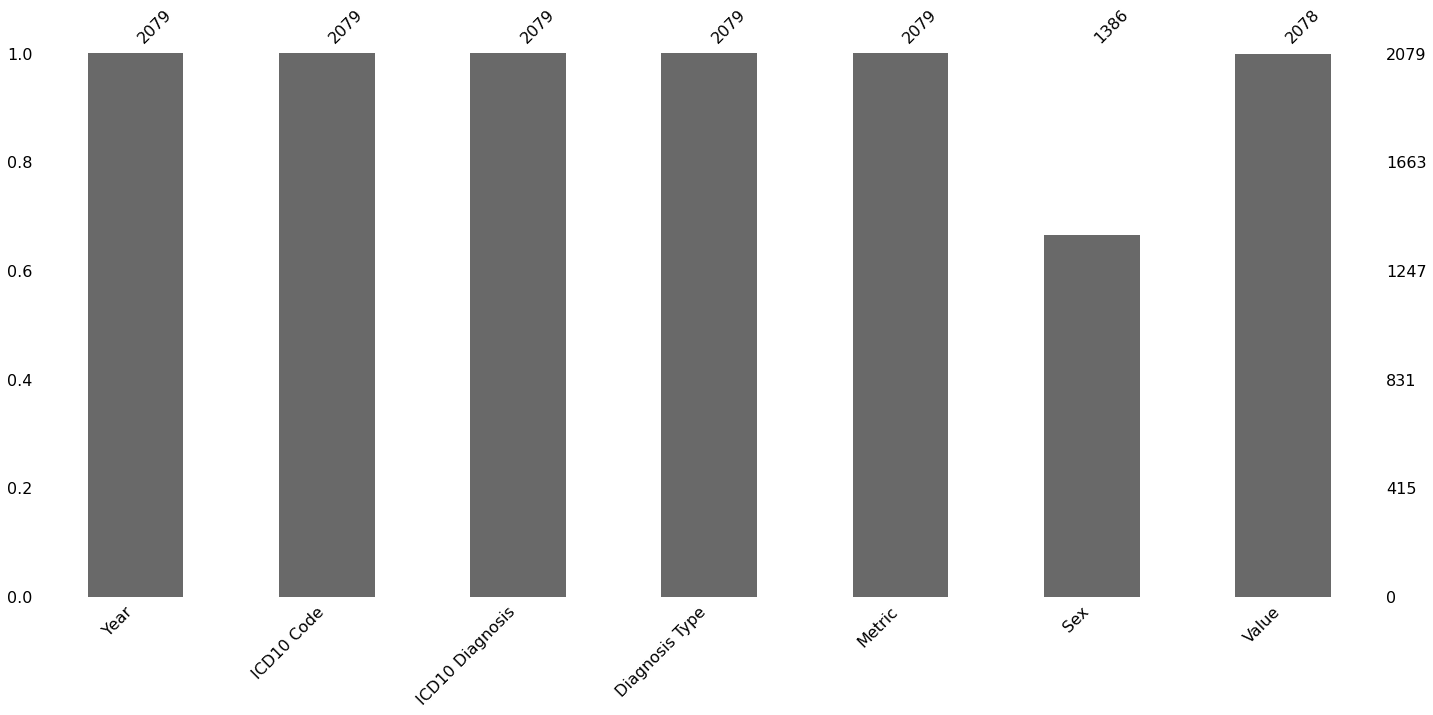

In [6]:
import missingno as mn
mn.bar(df)

In [7]:
df.isnull().sum()

Year                 0
ICD10 Code           0
ICD10 Diagnosis      0
Diagnosis Type       0
Metric               0
Sex                693
Value                1
dtype: int64

#### Yes, so there is 693 missing values on field 'Sex' and 1 missing value on field 'Value'. We also found earlier that we had '.' value on 'Value' column which might be affecting the number. Therefore let's count the number of '.'

In [8]:
df.value_counts('Value').head(2)

Value
.      40
600    19
dtype: int64

#### Ya it seems there are '.' value under 'Value'. Let's just replace '.' with 0 for now

In [9]:
df["Value"].replace({".": 0,}, inplace=True)

#### making sure we updates the values column

In [10]:
df.value_counts('Value').head(2)

Value
0      40
600    19
dtype: int64

#### filling na and also converting the datatype of the value to integer 

In [11]:
df['Value'].fillna(0)

0       11011882
1        1713330
2        1691035
3         611002
4         907157
          ...   
2074        1400
2075         700
2076        8900
2077        4900
2078         700
Name: Value, Length: 2079, dtype: object

In [12]:
df['Value'].astype(np.float).astype("Int32")

0       11011882
1        1713330
2        1691035
3         611002
4         907157
          ...   
2074        1400
2075         700
2076        8900
2077        4900
2078         700
Name: Value, Length: 2079, dtype: Int32

#### Let's explore Diagnosis column which we are most interested in. First let's see for column diagnosis type by finding out all unique diagnosis type there are recorded on our dataset.

In [13]:
print(df['Diagnosis Type'].unique())

['All admissions' 'All diseases which can be caused by smoking'
 'All cancers' 'All respiratory diseases' 'All circulatory diseases'
 'All diseases of the digestive system'
 'Cancers which can be caused by smoking'
 'Respiratory diseases which can be caused by smoking'
 'Circulatory diseases which can be caused by smoking'
 'Digestive diseases which can be caused caused by smoking'
 'Other diseases which can be caused by smoking']


#### Let's see the distribution (count) of each diagnosis type

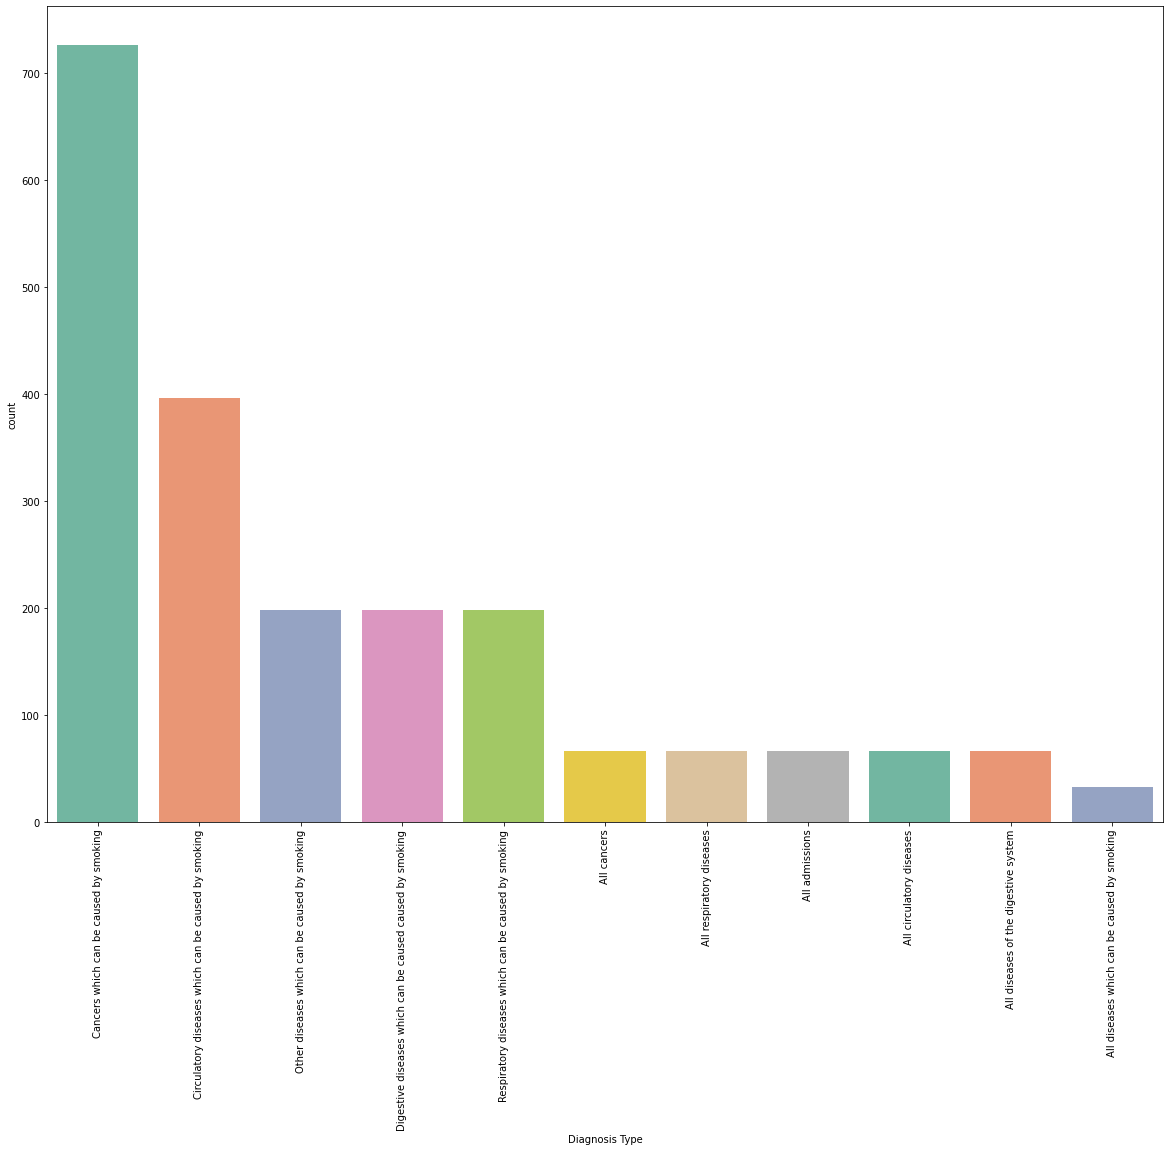

In [14]:
ax, fig = plt.subplots(figsize=[20,15])
count = sns.countplot(x ='Diagnosis Type', data = df, palette = "Set2",
                      order = df['Diagnosis Type'].value_counts().index)
label = count.get_xticklabels()
count.set_xticklabels(label,rotation=90)
None # this is to make sure that label wont print

#### Seems like most data are recorded for cancers whcih can be caused by smoking as well as circulatory diseases which can be caused by somoking. Least data are for all deseases which can be caused by smoking.

#### Now let's do similar tasks for diagnosis. Let's get started by seeing the unique diagnosis

In [15]:
df['ICD10 Diagnosis'].unique()

array(['All admissions', 'All diseases which can be caused by smoking',
       'All cancers', 'All respiratory diseases',
       'All circulatory diseases', 'All diseases of the digestive system',
       'Trachea, Lung, Bronchus', 'Upper Respiratory Sites', 'Oesophagus',
       'Larynx', 'Cervical', 'Bladder', 'Kidney and Renal Pelvis',
       'Stomach', 'Pancreas', 'Unspecified Site', 'Myeloid Leukaemia',
       'Chronic Obstructive Lung Disease', 'Chronic Airway Obstruction',
       'Pneumonia, Influenza', 'Other Heart Disease',
       'Ischaemic Heart Disease', 'Other arterial disease',
       'Cerebrovascular Disease', 'Aortic Aneurysm', 'Atherosclerosis',
       'Stomach / Duodenal Ulcer', 'Crohns Disease',
       'Periodontal Disease / Periodonitis', 'Age Related Cataract 45+',
       'Hip Fracture 55+', 'Spontaneous Abortion'], dtype=object)

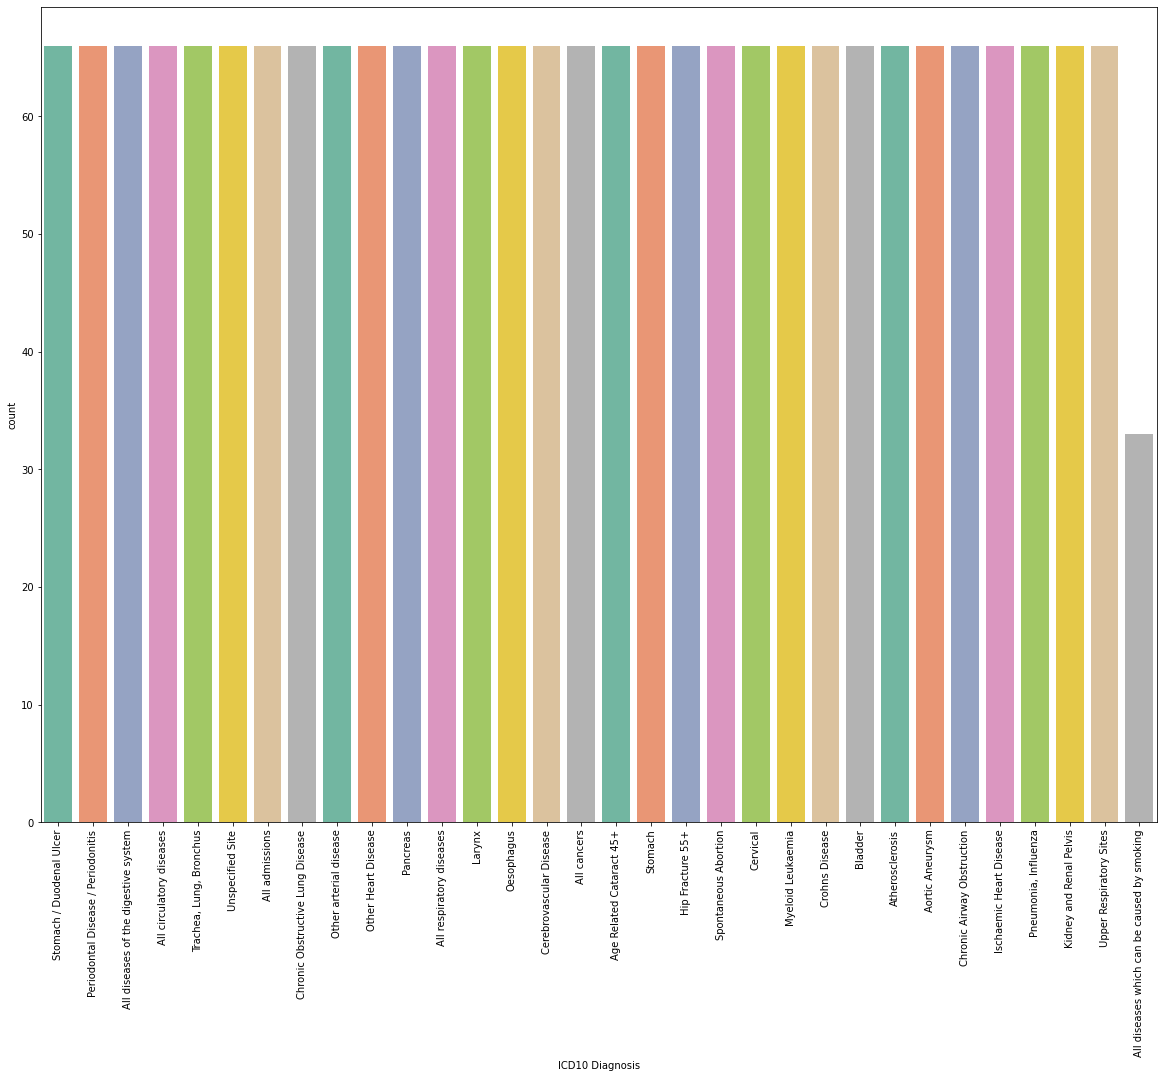

In [16]:
ax, fig = plt.subplots(figsize=[20,15])
count = sns.countplot(x ='ICD10 Diagnosis', data = df, palette = "Set2",
                      order = df['ICD10 Diagnosis'].value_counts().index)
label = count.get_xticklabels()
count.set_xticklabels(label,rotation=90)
None # this is to make sure that label wont print

#### For diagnosis most of the data are equally distributed besides for the 'All diseases which can be caused by smoking'.

#### let's also see if data is distributed evenly on year.

In [17]:
df[['Year', 'ICD10 Diagnosis']].groupby(['Year']).count()

,ICD10 Diagnosis
Year,
2004/05,189
2005/06,189
2006/07,189
2007/08,189
2008/09,189
2009/10,189
2010/11,189
2011/12,189
2012/13,189


#### and it seems the diagnosis data are evenly distributed

#### Let's also visualize the 'Sex' column. Let's first fill the missing value with Missing for now

In [18]:
df['Sex_filled_na'] = df['Sex'].fillna('Missing')

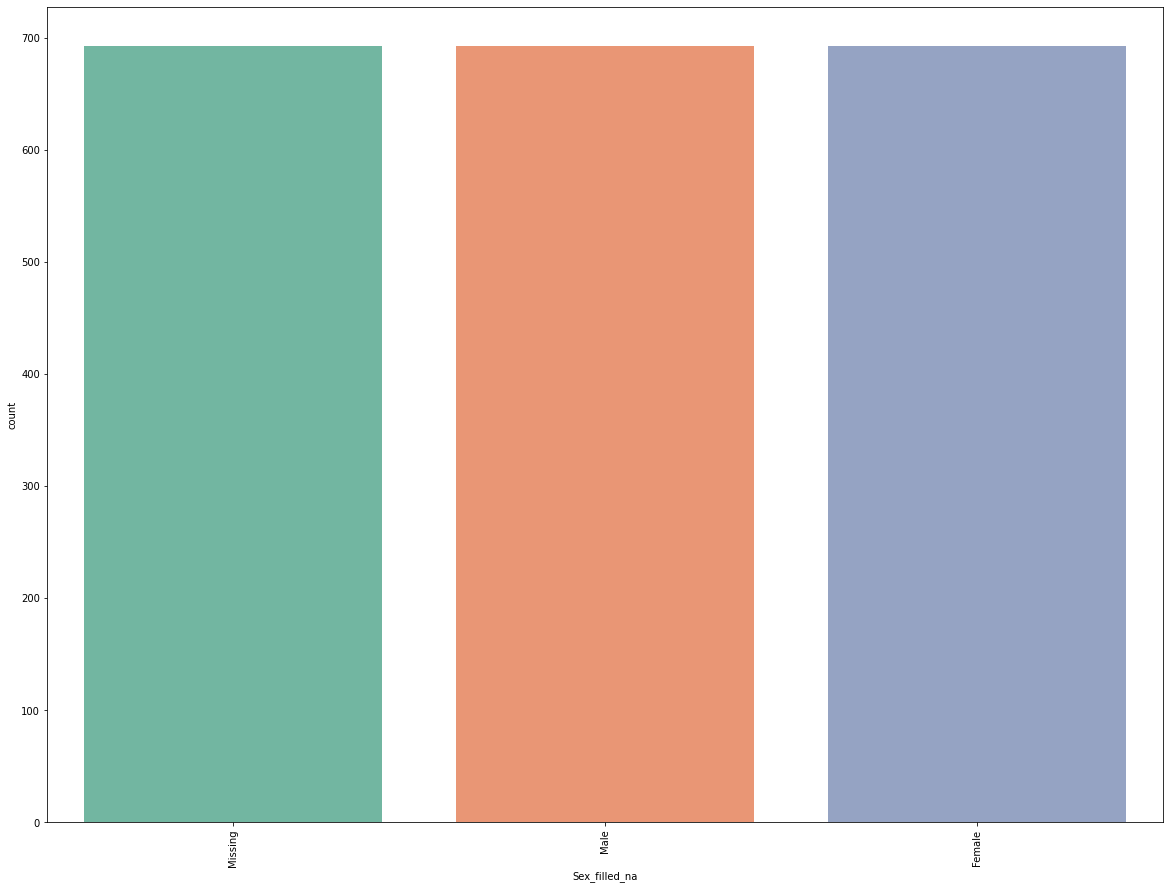

In [19]:
ax, fig = plt.subplots(figsize=[20,15])
count = sns.countplot(x ='Sex_filled_na', data = df, palette = "Set2",
                      order = df['Sex_filled_na'].value_counts().index)
label = count.get_xticklabels()
count.set_xticklabels(label,rotation=90)
None # this is to make sure that label wont print

<AxesSubplot:ylabel='Sex_filled_na'>

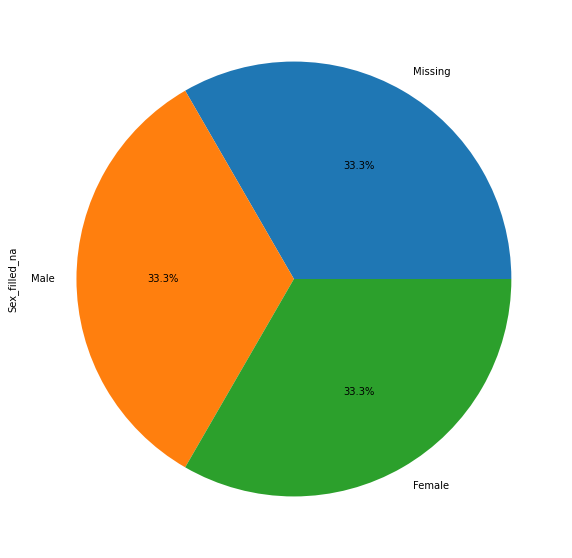

In [20]:
ax, fig = plt.subplots(figsize=[10,10])
df['Sex_filled_na'].value_counts().plot(kind='pie', autopct='%1.1f%%')

#### The count seems even fo this column too.

# Hypothesis Testing:

We use 'ttest_ind' from scipy.stats to test our hypothesis.The t-test quantifies the difference between the arithmetic means of the two samples. The p-value quantifies the probability of observing as or more extreme values assuming the null hypothesis, that the samples are drawn from populations with the same population means, is true. A p-value larger than a chosen threshold (e.g. 5% or 1%) indicates that our observation is not so unlikely to have occurred by chance. Therefore, we do not reject the null hypothesis of equal population means. If the p-value is smaller than our threshold, then we have evidence against the null hypothesis of equal population means.

Here we use 5% or 0.05 as threshold. If p value is larger we will not reject our null hypothesis.

## Hypothesis 1.

Null hypothesis:  Admissions attributed to tobacco use are no different between males and females

Let's start testing our hypothesis by separating values of male and females and take the ttest. If p value of ttest is greater than 0.05 we cannot reject the null hypothesis, else we reject the hypothesis.

In [21]:
male = df[df['Sex'] == 'Male']
male.head()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value,Sex_filled_na
63,2014/15,All codes,All admissions,All admissions,Number of admissions,Male,5141482,Male
64,2014/15,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All diseases which can be caused by smoking,All diseases which can be caused by smoking,Number of admissions,Male,931001,Male
65,2014/15,C00-D48,All cancers,All cancers,Number of admissions,Male,828031,Male
66,2014/15,J00-J99,All respiratory diseases,All respiratory diseases,Number of admissions,Male,300450,Male
67,2014/15,I00-I99,All circulatory diseases,All circulatory diseases,Number of admissions,Male,522587,Male


In [22]:
female = df[df['Sex'] == 'Female']
female.head()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value,Sex_filled_na
126,2014/15,All codes,All admissions,All admissions,Number of admissions,Female,5870400,Female
127,2014/15,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All diseases which can be caused by smoking,All diseases which can be caused by smoking,Number of admissions,Female,782329,Female
128,2014/15,C00-D48,All cancers,All cancers,Number of admissions,Female,863004,Female
129,2014/15,J00-J99,All respiratory diseases,All respiratory diseases,Number of admissions,Female,310552,Female
130,2014/15,I00-I99,All circulatory diseases,All circulatory diseases,Number of admissions,Female,384570,Female


Let's calculate all the value where smoking or tobacco is attributed.

In [23]:
relating_attribute = ['All diseases which can be caused by smoking','Cancers which can be caused by smoking','Circulatory diseases which can be caused by smoking']

In [24]:
val_male = male[male['Diagnosis Type'].isin(relating_attribute)]['Value'].astype(int) 

In [25]:
val_female = female[female['Diagnosis Type'].isin(relating_attribute)]['Value'].astype(int)

#### Now let's calculate ttest and check if p value is greater than 0.05 or not

In [26]:
from scipy.stats import ttest_ind

In [27]:
stats,p = ttest_ind(val_male,val_female)

In [28]:
print('Stats : %.3f, P: %.3f' % (stats,p))

Stats : 1.505, P: 0.133


In [29]:
if p > 0.05:
    print('Cannot reject null Hypothesis')
else:
    print("Reject Hypothesis")

Cannot reject null Hypothesis


## This means we cannot reject our null hypothesis or admissions attributed to tobacco use are no different between males and females

## Hypothesis 2.

Null hypothesis:  Admissions attributed to tobacco use are no different between respiratory and digestive diseases


for this too, we will seperate the data for respiratory and digestive diseases and take the ttest. If p value of ttest is greater than 0.05 we cannot reject the null hypothesis, else we reject the hypothesis. 

In [30]:
respiratory = df[df['Diagnosis Type'].isin(['Respiratory diseases which can be caused by smoking'])]['Value'].astype(int) 

In [31]:
circulatory = df[df['Diagnosis Type'].isin(['Circulatory diseases which can be caused by smoking'])]['Value'].astype(int) 
 

#### Now let's calculate ttest and check if p value is greater than 0.05 or not

In [32]:
from scipy.stats import ttest_ind

stats,p = ttest_ind(respiratory,circulatory)

In [33]:
print('Stats : %.3f, P: %.3f' % (stats,p))

Stats : -1.118, P: 0.264


In [34]:
if p > 0.05:
    print('Cannot reject null Hypothesis')
else:
    print("Reject Hypothesis")

Cannot reject null Hypothesis


## This means we cannot reject our null hypothesis or admissions attributed to tobacco use are no different between respiratory and digestive diseases

# Conclusion:

From the tests above, we can conclude 2 different hypothesis,

For hypothesis 1, we cannot reject our null hypothesis which means admissions attributed to tobacco use are no different between males and females

And for hypothesis 2,we cannot reject our null hypothesis or admissions attributed to tobacco use are no different between respiratory and digestive diseases